Name: Pineda, Rachel Joy D.<br>
Course and Section:  CPE019-CPE32S3 <br>
Date of Submission: February 07, 2024<br>
Instructor: Engr. Roman Richard<br>

# Lab - Correlation Analysis in Python<font color='red'> </font>

### Objectives

<b>
* Part 1: The Dataset <br>
* Part 2: Scatterplot Graphs and Correlatable Variables <br>
* Part 3: Calculating Correlation with Python <br>
* Part 4: Visualizing <br>
</b>

### Scenario/Background

Correlation is an important statistical relationship that can indicate whether the variable values are linearly related.

In this lab, you will learn how to use Python to calculate correlation. In Part 1, you will setup the dataset. In Part 2, you will learn how to identify if the variables in a given dataset are correlatable. Finally, in Part 3, you will use Python to calculate the correlation between two sets of variable.

### Required Resources
* 1 PC with Internet access
* Raspberry Pi version 2 or higher
* Python libraries: pandas, numpy, matplotlib, seaborn
* Datafiles: brainsize.txt

## Part 1: The Dataset

You will use a dataset that contains a sample of 40 right-handed Anglo Introductory Psychology students at a large Southwestern university. Subjects took four subtests (Vocabulary, Similarities, Block Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. The researchers used Magnetic Resonance Imaging (MRI) to determine the brain size of the subjects. Information about gender and body size (height and weight) are also included. The researchers withheld the weights of two subjects and the height of one subject for reasons of confidentiality.
Two simple modifications were applied to the dataset:

1. Replace the quesion marks used to represent the withheld data points described above by the 'NaN' string. The substitution was done because Pandas does not handle the question marks correctly.

2. Replace all tab characters with commas, converting the dataset into a CSV dataset.

The prepared dataset is saved as `brainsize.txt`.

#### Step 1: Loading the Dataset From a File.

Before the dataset can be used, it must be loaded onto memory.

In the code below, The first line imports the `pandas` modules and defines `pd` as a descriptor that refers to the module.

The second line loads the dataset CSV file into a variable called `brainFile`.

The third line uses `read_csv()`, a `pandas` method, to convert the CSV dataset stored in `brainFile` into a dataframe. The dataframe is then stored in the `brainFrame` variable.

Run the cell below to execute the described functions.

In [ ]:
# Code cell 1
import pandas as pd
brainFile = '/content/brainsize.txt'
brainFrame = pd.read_csv(brainFile, sep= "\t")

#### Step 2: Verifying the dataframe.

To make sure the dataframe has been correctly loaded and created, use the `head()` method. Another Pandas method, `head()` displays the first five entries of a dataframe.

In [ ]:
# Code cell 2
brainFrame.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,Female,133,132,124,118.0,64.5,816932
1,Male,140,150,124,NaN,72.5,1001121
2,Male,139,123,150,143.0,73.3,1038437
3,Male,133,129,128,172.0,68.8,965353
4,Female,137,132,134,147.0,65.0,951545


## Part 2: Scatterplot Graphs and Correlatable Variables

#### Step 1: The pandas `describe()` method.
The pandas module includes the `describe()` method which performs same common calculations against a given dataset. In addition to provide common results including count, mean, standard deviation, minimum, and maximum,  `describe()` is also a great way to quickly test the validity of the values in the dataframe.<p>
Run the cell below to output the results computed by `describe()` against the `brainFrame` dataframe.

In [ ]:
# Code cell 3
brainFrame.describe()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


#### Step 2: Scatterplot graphs

Scatterplot graphs are important when working with correlations as they allow for a quick visual verification of the nature of the relationship between the variables. This lab uses the Pearson correlation coefficient, which is sensitive only to a linear relationship between two variables. Other more robust correlation methods exist but are out of the scope of this lab.

##### a. Load the required modules.
Before graphs can be plotted, it is necessary to import a few modules, namely `numpy` and `matplotlib`. Run the cell below to load these modules.

In [ ]:
# Code cell 4
import numpy as np
import matplotlib.pyplot as plt

##### b. Separate the data.
To ensure the results do not get skewed because of the differences in male and female bodies, the dateframe is split into two dataframes: one containing all male entries and another with only female instances. <p>
Running the cell below creates the two new dataframes, menDf and womenDf, each one containing the respective entries.

In [ ]:
# Code cell 5
menDf = brainFrame[(brainFrame.Gender == 'Male')]
womenDf = brainFrame[(brainFrame.Gender == 'Female')]

##### c. Plot the graphs.
Because the dataset includes three different measures of intelligence (PIQ, FSIQ, and VIQ), the first line below uses Pandas `mean()` method to calculate the mean value between the three and store the result in the `menMeanSmarts` variable. Notice that the first line also refers to the menDf, the filtered dataframe containing only male entries.<p>
The second line uses the `matplotlib` method `scatter()` to create a scatterplot graph between the `menMeanSmarts` variable and the `MRI_Count`attribute. The MRI_Count in this dataset can be thought as of a measure of the physical size of the subjects' brains.<p>
The third line simply displays the graph.<p>
The fourth line is used to ensure the graph will be displayed in this notebook.

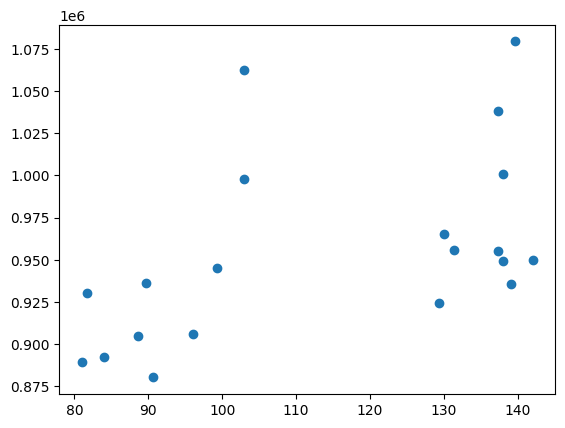

In [ ]:
# Code cell 6
menMeanSmarts = menDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(menMeanSmarts, menDf["MRI_Count"])
plt.show()
%matplotlib inline

Similarly, the code below creates a scatterplot graph for the women-only filtered dataframe.

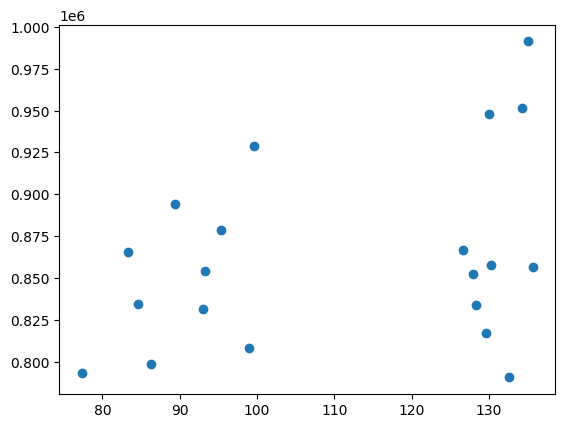

In [ ]:
# Code cell 7
# SOLUTION:
womenMeanSmarts = womenDf[["PIQ", "FSIQ", "VIQ"]].mean(axis=1)
plt.scatter(womenMeanSmarts, womenDf["MRI_Count"])

plt.show()
%matplotlib inline

## Part 3: Calculating Correlation with Python


#### Step 1: Calculate correlation against brainFrame.
The pandas `corr()` method provides an easy way to calculate correlation against a dataframe. By simply calling the method against a dataframe, one can get the correlation between all variables at the same time.

In [ ]:
# Code cell 8
brainFrame.corr(method='pearson')

<ipython-input-24-cab48f3abe05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  brainFrame.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.946639,0.934125,-0.051483,-0.086002,0.357641
VIQ,0.946639,1.000000,0.778135,-0.076088,-0.071068,0.337478
PIQ,0.934125,0.778135,1.000000,0.002512,-0.076723,0.386817
Weight,-0.051483,-0.076088,0.002512,1.000000,0.699614,0.513378
Height,-0.086002,-0.071068,-0.076723,0.699614,1.000000,0.601712
MRI_Count,0.357641,0.337478,0.386817,0.513378,0.601712,1.000000


Notice at the left-to-right diagonal in the correlation table generated above. Why is the diagonal filled with 1s? Is that a coincidence? Explain.

No, it is not coincedence but rather a mathematical property of correlation coefficients. The diagonal in the correlation table is filled with 1s because each variable correlates perfectly with itself.

Still looking at the correlation table above, notice that the values are mirrored; values below the 1 diagonal have a mirrored counterpart above the 1 diagonal. Is that a coincidence? Explain.

No, it is not coincedence but an inherent property of correlation. Because the values are mirrored across the diagonal because correlation is symmetric: the correlation between variables A and B is the same as the correlation between B and A.

Using the same `corr()` method, it is easy to calculate the correlation of the variables contained in the female-only dataframe:

In [ ]:
# Code cell 9
womenDf.corr(method='pearson')

<ipython-input-25-a6271751808a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  womenDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.955717,0.939382,0.038192,-0.059011,0.325697
VIQ,0.955717,1.000000,0.802652,-0.021889,-0.146453,0.254933
PIQ,0.939382,0.802652,1.000000,0.113901,-0.001242,0.396157
Weight,0.038192,-0.021889,0.113901,1.000000,0.552357,0.446271
Height,-0.059011,-0.146453,-0.001242,0.552357,1.000000,0.174541
MRI_Count,0.325697,0.254933,0.396157,0.446271,0.174541,1.000000


And the same can be done for the male-only dataframe:

In [ ]:
# Code cell 10
# SOLUTION:
menDf.corr(method='pearson')

<ipython-input-26-0aa059d6f661>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  menDf.corr(method='pearson')


,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
FSIQ,1.000000,0.944400,0.930694,-0.278140,-0.356110,0.498369
VIQ,0.944400,1.000000,0.766021,-0.350453,-0.355588,0.413105
PIQ,0.930694,0.766021,1.000000,-0.156863,-0.287676,0.568237
Weight,-0.278140,-0.350453,-0.156863,1.000000,0.406542,-0.076875
Height,-0.356110,-0.355588,-0.287676,0.406542,1.000000,0.301543
MRI_Count,0.498369,0.413105,0.568237,-0.076875,0.301543,1.000000


## Part 4: Visualizing

#### Step 1: Install Seaborn.
To make it easier to visualize the data correlations, heatmap graphs can be used. Based on colored squares, heatmap graphs can help identify correlations in a glance.

The Python module named `seaborn` makes it very easy to plot heatmap graphs.

First, run the cell below to download and install the `seaborn` module.

In [ ]:
# Code cell 11
!pip install seaborn

#### Step 2: Plot the correlation heatmap.

Now that the dataframes are ready, the heatmaps can be plotted. Below is a breakdown of the code in the cell below:

Line 1: Generates a correlation table based on the `womenNoGenderDf` dataframe and stores it on `wcorr`.<br>
Line 2: Uses the `seaborn` `heatmap()` method to generate and plot the heatmap. Notice that `heatmap()` takes `wcorr` as a parameter.<br>
Line 3: Use to export and save the generated heatmap as a PNG image. While the line 3 is not active (it has the comment `#` character preceding it, forcing the interpreter to ignore it), it was kept for informational purposes.

<ipython-input-28-4bc71e77167c>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wcorr = womenDf.corr()


<Axes: >

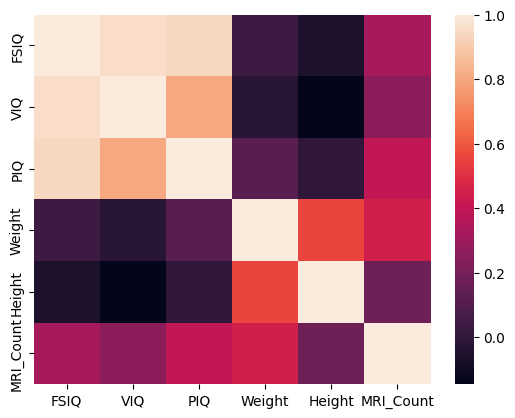

In [ ]:
# Code cell 12
import seaborn as sns

wcorr = womenDf.corr()
sns.heatmap(wcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Similarly, the code below creates and plots a heatmap for the male-only dataframe.

<ipython-input-29-ff3e250059fc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mcorr = menDf.corr()


<Axes: >

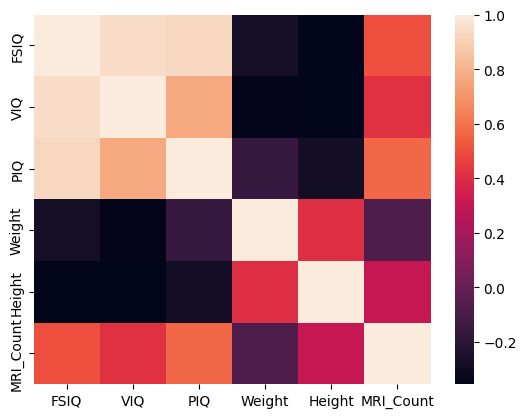

In [ ]:
# Code cell 14
mcorr = menDf.corr()
sns.heatmap(mcorr)
#plt.savefig('attribute_correlations.png', tight_layout=True)

Many variable pairs present correlation close to zero. What does that mean?

When many variable pairs present correlations close to zero, it indicates that there is little to no linear relationship between those variables.It's telling that brain size doesn't define whether the person is intelligent or not.

Why separate the genders?

The reason why it is seperated because there is still a significant correlation between the height and the weight even its correlation is close to zero.

What variables have stronger correlation with brain size (MRI_Count)? Is that expected? Explain.

The variables FSIQ and VIQ have a stronger correlation with brain size (MRI_Count) compared to PIQ in both male and female dataframes. This is generally expected as FSIQ and VIQ (Full Scale IQ and Verbal IQ) are more closely related to cognitive abilities, which are likely to be correlated with brain size.Because the bigger the person, the bigger the head, consequently, the bigger the brain.

**Supplementary Activity: Look for (any) real-world dataset and perform exploratory and statistical analysis.**

80 CEREALS AND ITS NUTRITION

Fields in the dataset:

Name: Name of cereal

1.   mfr: Manufacturer of cereal
  *   A = American Home Food Products
  *   G = General Mills
  *   K = Kelloggs
  *   N = Nabisco
  *   P = Post
  *   Q = Quaker Oats
  *   R = Ralston Purina
2.  type:
  *  cold
  *  hot

3.  calories: calories per serving
4.  protein: grams of protein
5.  fat: grams of fat
6.  sodium: milligrams of sodium
7.  fiber: grams of dietary fiber
8.  carbo: grams of complex carbohydrates
9.  sugars: grams of sugars
10.  potass: milligrams of potassium
11.  vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
12.  shelf: display shelf (1, 2, or 3, counting from the floor)
13.  weight: weight in ounces of one serving
14.  cups: number of cups in one serving
15.  rating






In [ ]:
import pandas as pd
cerealFile = '/content/cereal.csv' #csv is stored here
cerealNutrition = pd.read_csv(cerealFile)
cerealNutrition.head() #to view the first 5

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [ ]:
print("Dataset Sumaary")

cerealNutrition.describe() #

Dataset Sumaary


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


Summary of the Nutrition contents of all the Cereal presented in the data.


In [ ]:
coldDf = cerealNutrition[(cerealNutrition.type == 'Cold')]
hotDf = cerealNutrition[(cerealNutrition.type == 'Hot')]

<function matplotlib.pyplot.show(close=None, block=None)>

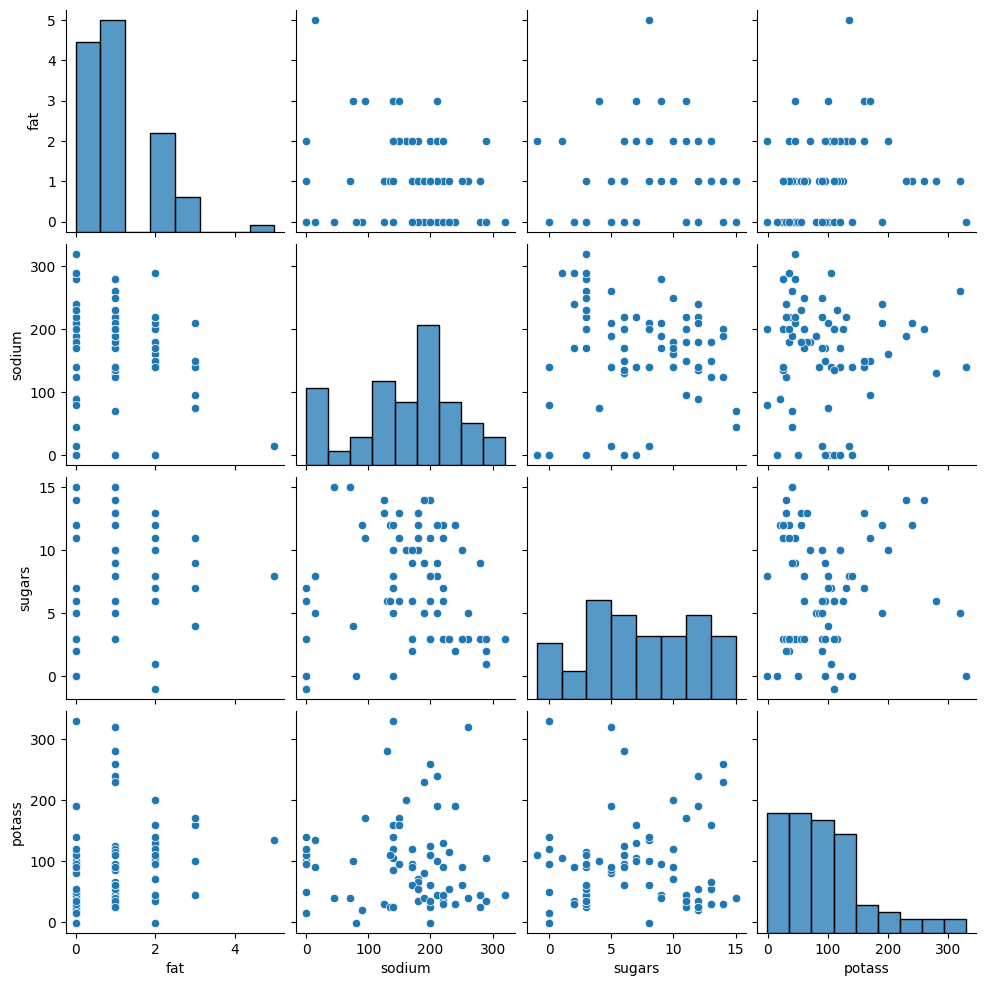

In [ ]:
#to be able to see multiple pairwise bivariate distributions in a dataset
sns.pairplot(cerealNutrition[["fat","sodium","sugars","potass"]])
plt.show

These are the nutriton values in cereals that needed to lookout especially if the contents are too much, in a way it will exceed the right amount needed to every individual.

<function matplotlib.pyplot.show(close=None, block=None)>

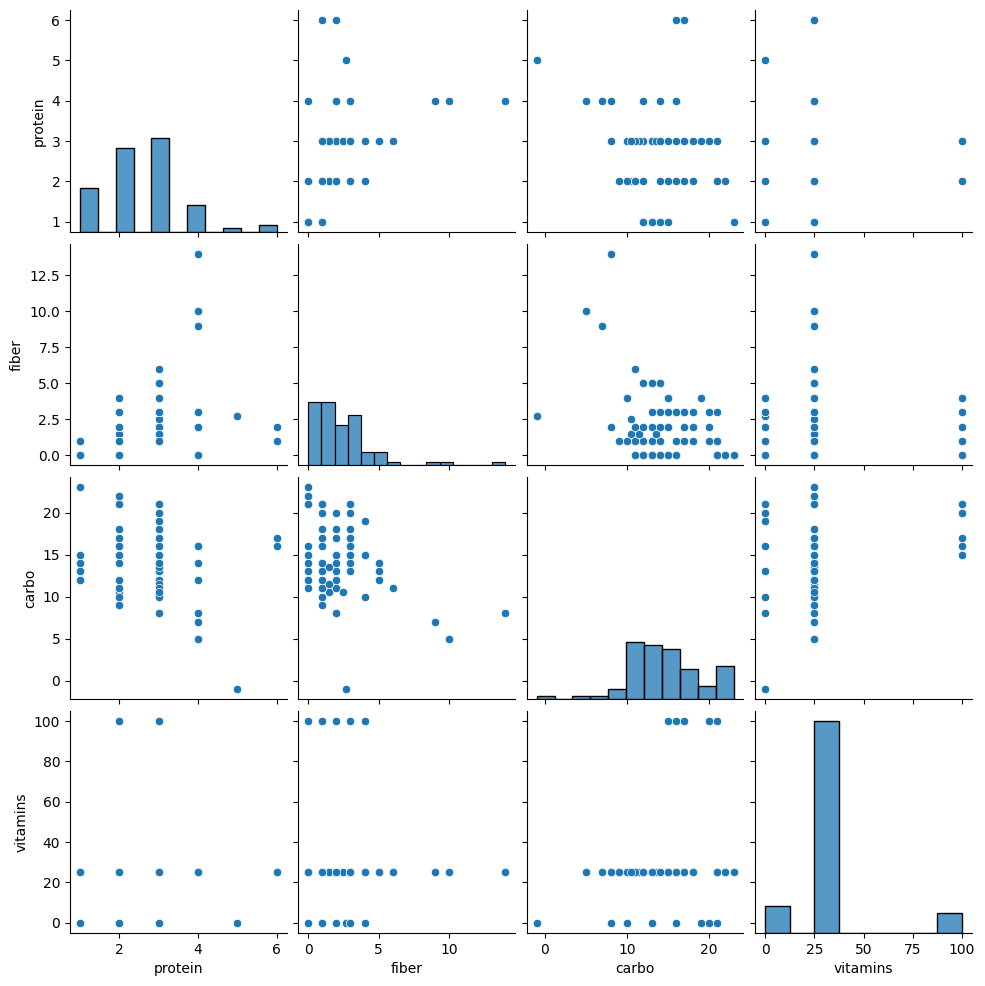

In [ ]:
#to be able to see multiple pairwise bivariate distributions in a dataset
sns.pairplot(cerealNutrition[["protein","fiber","carbo","vitamins"]])
plt.show

These are the components that a lot of people needed especially for the people who need enough nutrients in there body.

In [ ]:
cerealNutrition.corr(method='pearson')

<ipython-input-51-f354c58c153d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cerealNutrition.corr(method='pearson')


,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


<ipython-input-56-9ec82d22ae32>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cncorr=cerealNutrition.corr()


<Axes: >

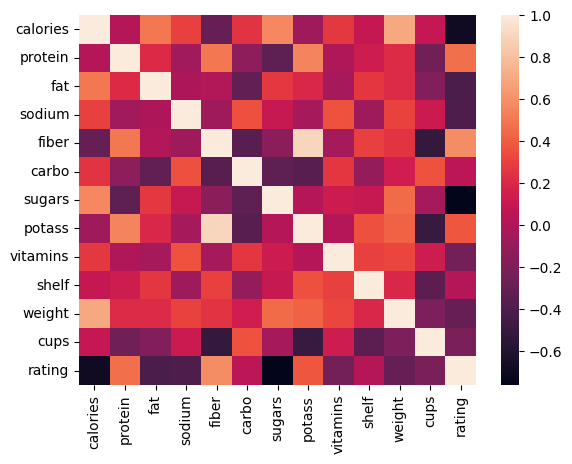

In [ ]:
#to see correlation coefficient betwee varialbles
import seaborn as sns

cncorr=cerealNutrition.corr()
sns.heatmap(cncorr)

I learned in this how to differentiate the data based on the analysation in differentiating that correlation in different sets. I have a hard time in the supplementary because I want to do a lot if things to know more about the datasets I was able to find but because of lack of the time, I wasn't able to explore especially I'm still trying to learn and analyze all the information in the procedure. This lesson is helpful for me especially for future research because I was able to visualize data, regression lines and etc.

Reference:
https://www.kaggle.com/datasets/crawford/80-cereals/data

<font size='0.5'>&copy; 2017 Cisco and/or its affiliates. All rights reserved. This document is Cisco Public.<font>